In [1]:
library(tidyverse)

library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# configuring figure size
options(repr.plot.width = 10, repr.plot.height = 10)

# colorblind-friendly color palette
cbPalette <- c('#56B4E9', '#0072B2', '#999999', '#CC79A7', '#F0E442', '#009E73', '#E69F00', '#D55E00')

In [3]:
df1 <- read_csv('Classification--All--Full_Set.csv')

Rows: 17 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Method, Criterion
dbl (5): Pruning, Train_Score, Test_Score, Train_Corr, Test_Corr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
df1 <- df1 %>% 
    pivot_longer(c(Train_Score:Test_Corr), names_to = 'Type1', values_to = 'Value') %>%
    separate(Type1, into = c('Train_Test', 'Type'), sep = '_') %>%
    mutate_at(vars(Criterion, Pruning), list(factor))

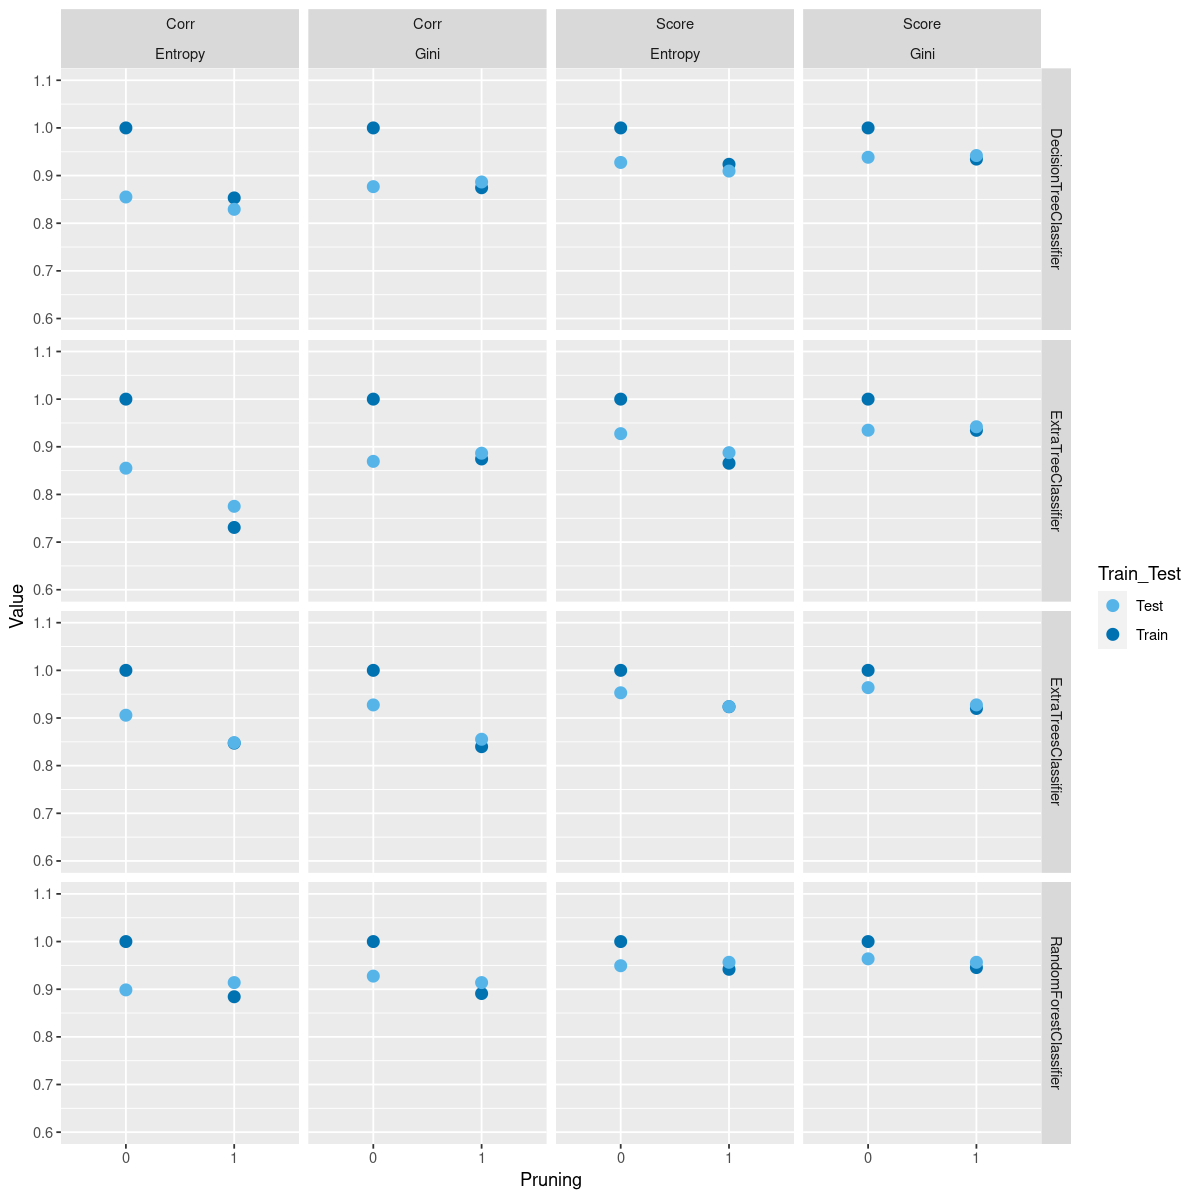

In [5]:
df1 %>% 
    filter(Method != 'Bagging') %>%
    ggplot(aes(x = Pruning, y = Value, color = Train_Test)) +
    geom_point(size = 3) +
    scale_color_manual(values = cbPalette) +
    scale_y_continuous(limits = c(0.6, 1.1)) +
    facet_grid(rows = vars(Method), cols = vars(Type, Criterion))

In [6]:
df2 <- read_csv('Classification--All--Sampling.csv')

Rows: 17 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Method, Criterion
dbl (5): Pruning, Train_Score, Test_Score, Train_Corr, Test_Corr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
df2 <- df2 %>% 
    pivot_longer(c(Train_Score:Test_Corr), names_to = 'Type1', values_to = 'Value') %>%
    separate(Type1, into = c('Train_Test', 'Type'), sep = '_') %>%
    mutate_at(vars(Criterion, Pruning), list(factor))

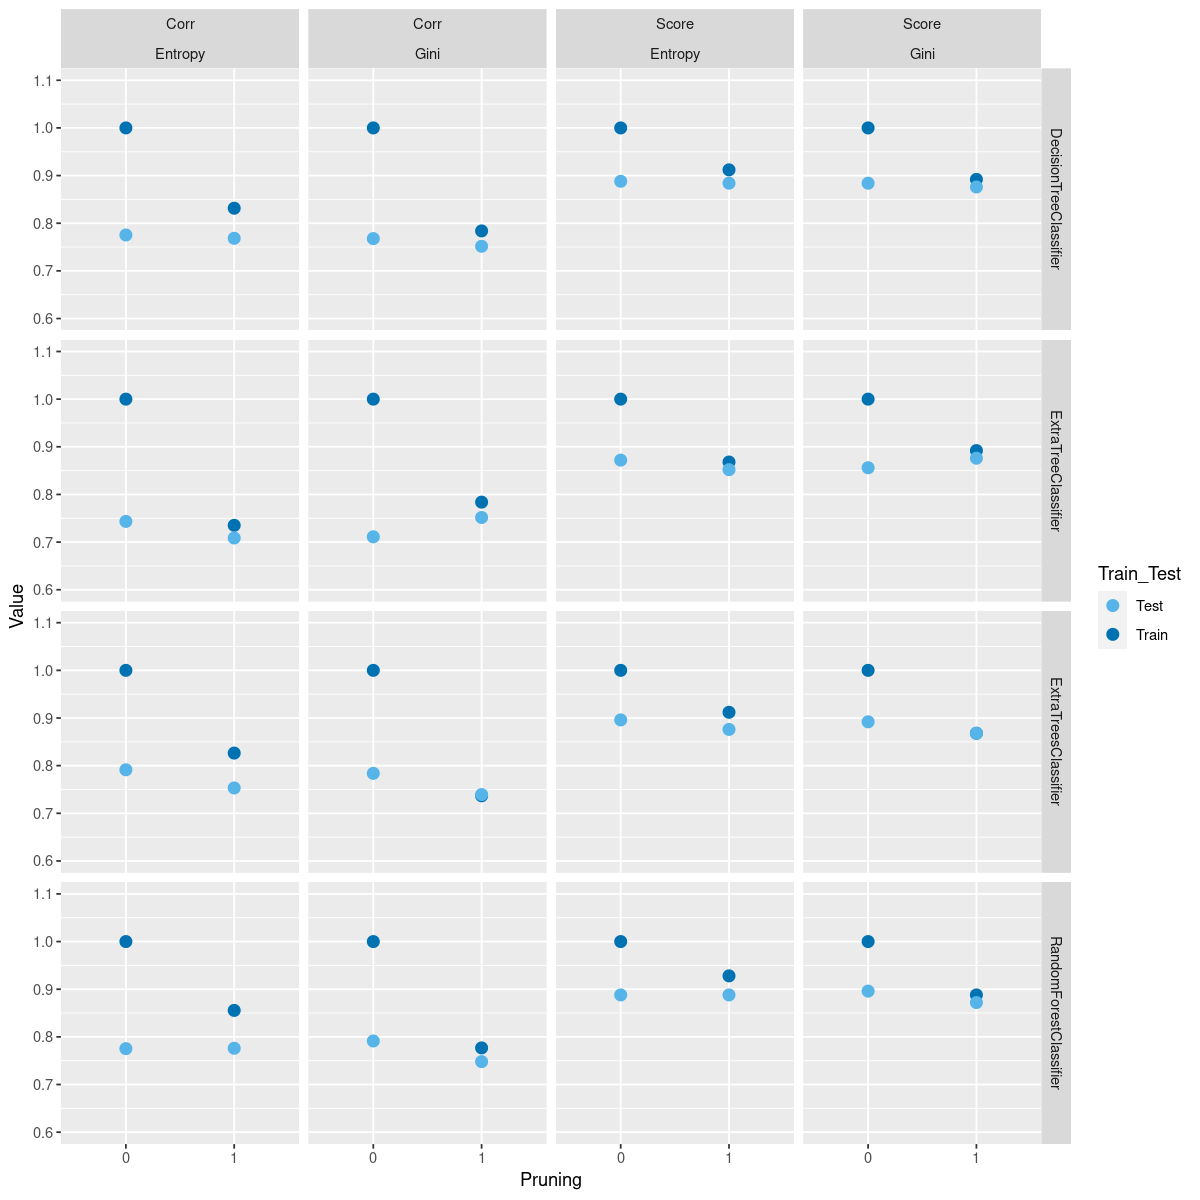

In [8]:
df2 %>% 
    filter(Method != 'Bagging') %>%
    ggplot(aes(x = Pruning, y = Value, color = Train_Test)) +
    geom_point(size = 3) +
    scale_color_manual(values = cbPalette) +
    scale_y_continuous(limits = c(0.6, 1.1)) +
    facet_grid(rows = vars(Method), cols = vars(Type, Criterion))